In [23]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df = pd.merge(clinical_trial_data_df, mouse_drug_data_df, how="outer", on="Mouse ID")

# Display the data table for preview
df.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [24]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
df_mean_tumor_vol = df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()

# Convert to DataFrame
# Preview DataFrame

df_mean_tumor_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [25]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
df_std_tumor_vol = df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()

# Preview DataFrame
df_std_tumor_vol.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [26]:
# Minor Data Munging to Re-Format the Data Frames
df_mean_tumor_vol.pivot(index='Timepoint', columns='Drug')

# Preview that Reformatting worked


Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

Text(0, 0.5, 'Tumor Volume (mm3)')

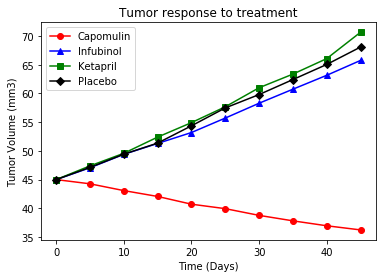

In [27]:
# Generate the Plot (with Error Bars)

capomulin = df_mean_tumor_vol[df_mean_tumor_vol.Drug == 'Capomulin']
capomulin.drop(columns=['Drug'], inplace=True)

infubinol = df_mean_tumor_vol[df_mean_tumor_vol.Drug == 'Infubinol']
infubinol.drop(columns=['Drug'], inplace=True)

ketapril = df_mean_tumor_vol[df_mean_tumor_vol.Drug == 'Ketapril']
ketapril.drop(columns=['Drug'], inplace=True)

placebo = df_mean_tumor_vol[df_mean_tumor_vol.Drug == 'Placebo']
placebo.drop(columns=['Drug'], inplace=True)

plot_c, = plt.plot(capomulin['Timepoint'], capomulin['Tumor Volume (mm3)'], color = "red", marker = "o", label = "Capomulin")
plot_i, = plt.plot(infubinol['Timepoint'], infubinol['Tumor Volume (mm3)'], color = "blue", marker = "^", label = "Infubinol")
plot_k, = plt.plot(ketapril['Timepoint'], ketapril['Tumor Volume (mm3)'], color = "green", marker = "s", label = "Ketapril")
plot_p, = plt.plot(placebo['Timepoint'], placebo['Tumor Volume (mm3)'], color = "black", marker = "D", label = "Placebo")

plt.legend(handles=[plot_c, plot_i, plot_k, plot_p], loc="best")

plt.title("Tumor response to treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")


# Save the Figure



In [28]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [29]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
df_mean_met_site = df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean().reset_index()

# Convert to DataFrame

# Preview DataFrame
df_mean_met_site.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [30]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
df_std_met_site = df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem().reset_index()

# Convert to DataFrame

# Preview DataFrame
df_std_met_site.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [31]:
# Minor Data Munging to Re-Format the Data Frames
df_mean_met_site.pivot(index='Timepoint', columns='Drug')

# Preview that Reformatting worked


Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

Text(0, 0.5, 'Met. Sites')

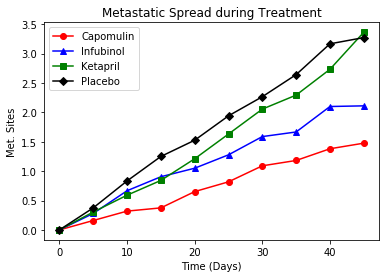

In [32]:
# Generate the Plot (with Error Bars)

capomulin = df_mean_met_site[df_mean_met_site.Drug == 'Capomulin']
capomulin.drop(columns=['Drug'], inplace=True)

infubinol = df_mean_met_site[df_mean_met_site.Drug == 'Infubinol']
infubinol.drop(columns=['Drug'], inplace=True)

ketapril = df_mean_met_site[df_mean_met_site.Drug == 'Ketapril']
ketapril.drop(columns=['Drug'], inplace=True)

placebo = df_mean_met_site[df_mean_met_site.Drug == 'Placebo']
placebo.drop(columns=['Drug'], inplace=True)

plot_c, = plt.plot(capomulin['Timepoint'], capomulin['Metastatic Sites'], color = "red", marker = "o", label = "Capomulin")
plot_i, = plt.plot(infubinol['Timepoint'], infubinol['Metastatic Sites'], color = "blue", marker = "^", label = "Infubinol")
plot_k, = plt.plot(ketapril['Timepoint'], ketapril['Metastatic Sites'], color = "green", marker = "s", label = "Ketapril")
plot_p, = plt.plot(placebo['Timepoint'], placebo['Metastatic Sites'], color = "black", marker = "D", label = "Placebo")

plt.legend(handles=[plot_c, plot_i, plot_k, plot_p], loc="best")

plt.title("Metastatic Spread during Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Met. Sites")

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [33]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = df.groupby(["Drug", "Timepoint"])["Mouse ID"].count().reset_index()

# Convert to DataFrame

# Preview DataFrame
mice_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [34]:
# Minor Data Munging to Re-Format the Data Frames
mice_count.pivot(index='Timepoint', columns='Drug')

# Preview the Data Frame


Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   
25               22       18        18       19       18      17       14   
30               22       16        17       18       15      15       13   
35               22       14        12       17       15      14       10   
40               21       14        10       15       15      12        9   
45               21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

Text(0, 0.5, 'Survival Days')

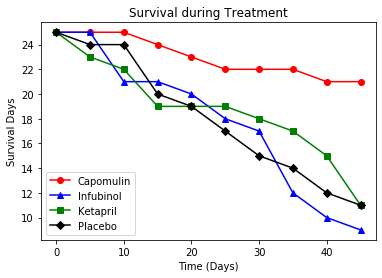

In [35]:
# Generate the Plot (Accounting for percentages)

capomulin = mice_count[mice_count.Drug == 'Capomulin']
capomulin.drop(columns=['Drug'], inplace=True)

infubinol = mice_count[mice_count.Drug == 'Infubinol']
infubinol.drop(columns=['Drug'], inplace=True)

ketapril = mice_count[mice_count.Drug == 'Ketapril']
ketapril.drop(columns=['Drug'], inplace=True)

placebo = mice_count[mice_count.Drug == 'Placebo']
placebo.drop(columns=['Drug'], inplace=True)

plot_c, = plt.plot(capomulin['Timepoint'], capomulin['Mouse ID'], color = "red", marker = "o", label = "Capomulin")
plot_i, = plt.plot(infubinol['Timepoint'], infubinol['Mouse ID'], color = "blue", marker = "^", label = "Infubinol")
plot_k, = plt.plot(ketapril['Timepoint'], ketapril['Mouse ID'], color = "green", marker = "s", label = "Ketapril")
plot_p, = plt.plot(placebo['Timepoint'], placebo['Mouse ID'], color = "black", marker = "D", label = "Placebo")

plt.legend(handles=[plot_c, plot_i, plot_k, plot_p], loc="best")

plt.title("Survival during Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Days")


# Save the Figure

# Show the Figure
#plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [53]:
# Calculate the percent changes for each drug

####  Ran out of Time   ###

# Display the data to confirm


In [54]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure


![Metastatic Spread During Treatment](../Images/change.png)